In [178]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Import Data

In [179]:
data = pd.read_csv(r"C:\Users\prati\Desktop\Python\Machine Learning'\Assignment\LinearRegressionusingPython\LinearRegressionusingPython\Linear Regression using Python\Fish_dataset.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### 1. Value counts of Species

In [180]:
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

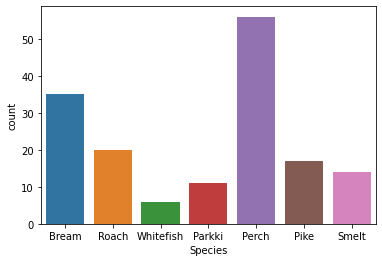

In [181]:
sns.countplot(x='Species',data=data)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [183]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


#### Check Null Values

In [184]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

No Missing Values

In [185]:
d1 = data.drop('Species',axis=1)
d1.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


# EDA

<AxesSubplot:>

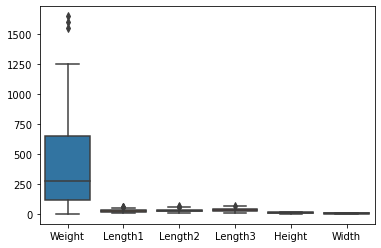

In [186]:
sns.boxplot(data=d1)

In [187]:
d1.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

### Treating Outliers by Winsorizing Technique

In [188]:
def treat_outliers(d1):
    for i in d1.columns:    
        q1=d1[i].quantile(0.25)
        q3=d1[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        if ((d1[i].dtype=='float64') | (d1[i].dtype=='int64')):
            d1[i][d1[i]<= lower_limit] = lower_limit
            d1[i][d1[i]>= upper_limit] = upper_limit
        else:
            d1[i]=d1[i]
    return d1
        
treat_outliers(d1)  

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:>

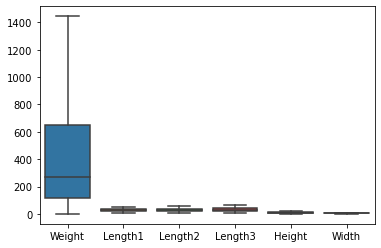

In [189]:
sns.boxplot(data=d1)

No outliers 

#### Check for normality of data

C:\Users\prati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

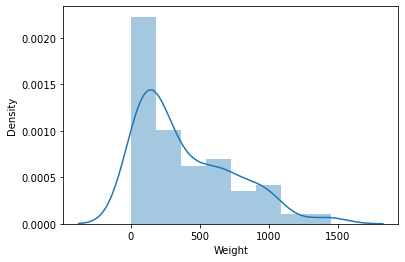

In [190]:
sns.distplot(d1.Weight)

* Data is skewed hence it requires treatment
* To make model normal, we apply sqrt method

## Splitting data into train and test dataset

In [191]:
X = d1.drop('Weight',axis=1)
y = np.sqrt(d1[['Weight']])

from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=600)

In [192]:
df = pd.concat([y_train,X_train],axis=1)
df.head()

,Weight,Length1,Length2,Length3,Height,Width
39,10.954451,18.6,20.0,22.2,6.2160,3.5742
132,20.736441,35.5,38.0,40.5,7.2900,4.5765
73,5.656854,12.5,13.7,14.7,3.5280,1.9992
100,14.035669,23.5,25.6,27.0,6.5610,4.2390
149,3.130495,10.7,11.2,12.4,2.0832,1.2772


## Correlation Matrix

In [193]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.938712,0.943583,0.953071,0.816276,0.949629
Length1,0.938712,1.000000,0.999517,0.992641,0.642413,0.875897
Length2,0.943583,0.999517,1.000000,0.994511,0.656697,0.881945
Length3,0.953071,0.992641,0.994511,1.000000,0.706591,0.879296
Height,0.816276,0.642413,0.656697,0.706591,1.000000,0.801939
Width,0.949629,0.875897,0.881945,0.879296,0.801939,1.000000


<AxesSubplot:>

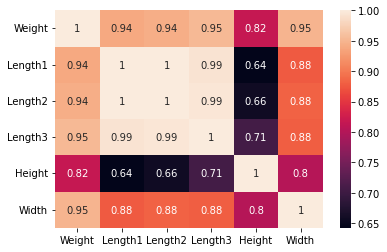

In [194]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:title={'center':'Relationship between Width and Weight'}, xlabel='Width', ylabel='Weight'>

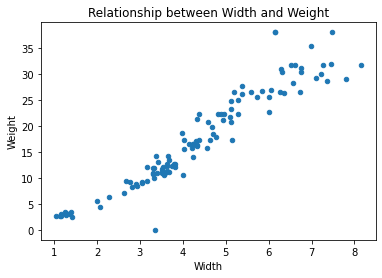

In [195]:
df.plot.scatter(x='Width', y='Weight', title='Relationship between Width and Weight')

Width have 95% strong positive relationship with Weight
* Width has high correlation with Weight
* There is multi-collinearity in the data

## Multi-colinearity with VIF

In [196]:
X1 = df.drop(['Weight'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i)
                          for i in range(X1.shape[1])],
                         index= X1.columns)
series_before

Length1    11963.586389
Length2    15651.253030
Length3     2315.947797
Height        50.523050
Width         98.004202
dtype: float64

#### Multi-colinearity exists in the data

# Model Building

* Ho:- There is no linear relationship between Weight and Length1, Length2, Length3, Height, Width.
* Vs.
* H1:- There is linear relationship between Weight and Length1, Length2, Length3, Height, Width.    
* Alpha = 0.05

In [197]:
import statsmodels.formula.api as smf
model= smf.ols('Weight ~ Length1 +Length2 +Length3 +Height +Width', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     724.6
Date:                Wed, 25 May 2022   Prob (F-statistic):           1.16e-79
Time:                        00:01:48   Log-Likelihood:                -208.18
No. Observations:                 111   AIC:                             428.4
Df Residuals:                     105   BIC:                             444.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9030      0.439    -15.727      0.000      -7.773      -6.033
Length1        0.7673      0.612      1.254      0.213      -0.446       1.981
Length2       -0.7667      0.647     -1.186      0.238      -2.049       0.516
Length3        0.4443      0.224      1.984      0.050       0.000       0.888
Height         0.3519      0.112      3.138      0.002       0.130       0.574
Width          2.0932      0.330      6.350      0.000       1.440       2.747
==============================================================================
Omnibus:                      110.986   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2495.874
Skew:                          -3.099   Prob(JB):                         0.00
Kurtosis:                      25.388   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is linear relationship between Weight and Width,Height.
* There is no linear relationship between Weight and Length1, Length2,Length3.
* So we will remove them, re-run the model.
* 97% accuracy of model, so we say model is goot fit

In [198]:
model2= smf.ols('Weight ~ Height +Width', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     547.3
Date:                Wed, 25 May 2022   Prob (F-statistic):           3.02e-57
Time:                        00:01:48   Log-Likelihood:                -272.54
No. Observations:                 111   AIC:                             551.1
Df Residuals:                     108   BIC:                             559.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3036      0.740     -7.166      0.000      -6.771      -3.837
Height         0.3288      0.104      3.177      0.002       0.124       0.534
Width          4.5616      0.266     17.125      0.000       4.034       5.090
==============================================================================
Omnibus:                       38.681   Durbin-Watson:                   2.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.026
Skew:                           0.886   Prob(JB):                     1.14e-55
Kurtosis:                      10.181   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is linear relationship between Weight and Width,Height.
* 91% accuracy of model , so model is good fit
* Y = -5.3036 + 0.3288 * Height + 4.5616 * Width

In [199]:
X1=df.loc[:,['Length1', 'Height']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Length1    8.222073
Height     8.222073
dtype: float64

There is no colinearity in the data

# Assumptions of model

* Linearity
* Homoscedasticity
* Normality
* Model error has to be Independently Identically Distributed.

In [200]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width
39,10.954451,18.6,20.0,22.2,6.2160,3.5742
132,20.736441,35.5,38.0,40.5,7.2900,4.5765
73,5.656854,12.5,13.7,14.7,3.5280,1.9992
100,14.035669,23.5,25.6,27.0,6.5610,4.2390
149,3.130495,10.7,11.2,12.4,2.0832,1.2772


In [201]:
y = -5.3036 + 0.3288 * 6.2160 + 4.5616 * 3.5742
y

13.044291519999998

In [202]:
df['fitted_value']=model2.fittedvalues 
df['residual']=model2.resid  
df.head()

,Weight,Length1,Length2,Length3,Height,Width,fitted_value,residual
39,10.954451,18.6,20.0,22.2,6.2160,3.5742,13.044461,-2.090010
132,20.736441,35.5,38.0,40.5,7.2900,4.5765,17.969715,2.766726
73,5.656854,12.5,13.7,14.7,3.5280,1.9992,4.976053,0.680801
100,14.035669,23.5,25.6,27.0,6.5610,4.2390,16.190461,-2.154792
149,3.130495,10.7,11.2,12.4,2.0832,1.2772,1.207489,1.923006


## Linearity

<AxesSubplot:title={'center':'Relationship between Height and Weight'}, xlabel='Height', ylabel='Weight'>

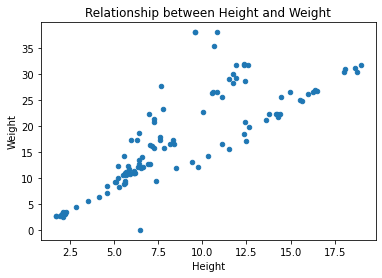

In [203]:
df.plot.scatter(x='Height', y='Weight', title='Relationship between Height and Weight')

# Homoscedasticity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

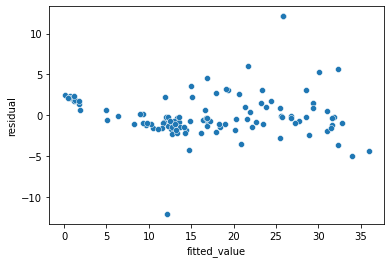

In [204]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

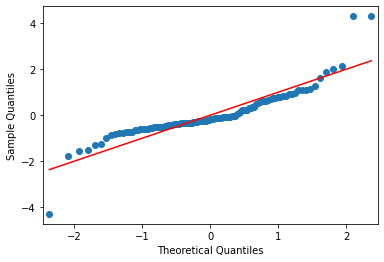

In [205]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s')
plt.show()

# Model error has to be IID

<AxesSubplot:ylabel='Frequency'>

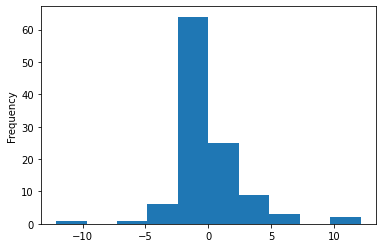

In [206]:
df['residual'].plot.hist()

C:\Users\prati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual', ylabel='Density'>

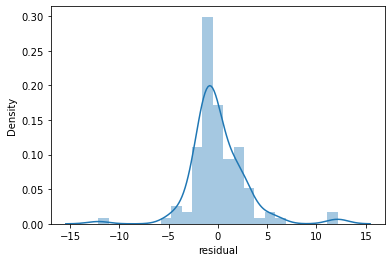

In [207]:
sns.distplot(df.residual)

Data is close to normal

# Predictions on test data set

In [208]:
df_test=pd.concat([x_test,y_test],axis=1)

df_test.head()

,Length1,Length2,Length3,Height,Width,Weight
122,37.1,40.0,42.5,11.1350,6.6300,28.635642
50,22.1,23.5,26.8,7.3968,4.1272,14.142136
92,20.5,22.5,24.0,6.7920,3.6240,12.247449
14,29.4,32.0,37.2,14.9544,5.1708,24.494897
158,13.8,15.0,16.2,2.9322,1.8792,4.460942


In [209]:
df_test['Prediction']=model2.predict(df_test) 
df_test.head()

,Length1,Length2,Length3,Height,Width,Weight,Prediction
122,37.1,40.0,42.5,11.1350,6.6300,28.635642,28.601300
50,22.1,23.5,26.8,7.3968,4.1272,14.142136,15.955304
92,20.5,22.5,24.0,6.7920,3.6240,12.247449,13.461031
14,29.4,32.0,37.2,14.9544,5.1708,24.494897,23.200912
158,13.8,15.0,16.2,2.9322,1.8792,4.460942,4.232747


# RMSE for evaluation on train data

In [210]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(df['Weight'],df['fitted_value'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 2.82


RMSE for train data <10 , good fit model

## Actual Values- (without sqrt treatment)

In [211]:
df_test['Prediction']=model2.predict(df_test)
df_test['Original_Prediction']=df_test.Prediction**2
df_test['Original_Weight']=df_test.Weight**2
df_test.head()

,Length1,Length2,Length3,Height,Width,Weight,Prediction,Original_Prediction,Original_Weight
122,37.1,40.0,42.5,11.1350,6.6300,28.635642,28.601300,818.034380,820.0
50,22.1,23.5,26.8,7.3968,4.1272,14.142136,15.955304,254.571719,200.0
92,20.5,22.5,24.0,6.7920,3.6240,12.247449,13.461031,181.199355,150.0
14,29.4,32.0,37.2,14.9544,5.1708,24.494897,23.200912,538.282329,600.0
158,13.8,15.0,16.2,2.9322,1.8792,4.460942,4.232747,17.916149,19.9


* This tables gives actual values of weight and prediction

# Confidence Interval at 95%

* As per the model, mean score of confidence interval at 95% lies between given range
* Upper_limit = -3.837
* Lower_limit = -6.771